# Credit card fraud detection

In [ ]:
#Import all dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [ ]:
#Load Dataset to a pandas DataFrame

credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
#Retrieve the first 5 and last 5 rows for checking the features of dataset

credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#Checking dataset information

credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Checking for null/missing values in dataset

credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_card_data.duplicated().sum()

1081

In [ ]:
credit_card_data = credit_card_data.drop_duplicates()

In [ ]:
credit_card_data.duplicated().sum()

0

In [ ]:
#Check the distribution of legit and fraudulent transactions

credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

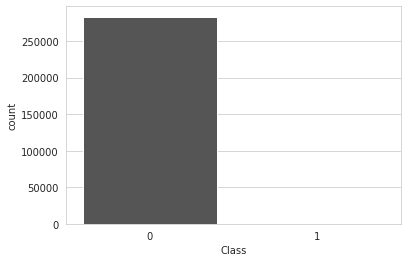

In [ ]:
sns.countplot(x="Class", data=credit_card_data, palette="gray")
plt.show()

# Here, the data is highly unbalanced as very less fraudulent cases exist

0 is legit transaction

1 is fraudulent transaction

In [ ]:
#Separating the dataset by class for analysis

legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
#Printing the shape by class

print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [ ]:
#Statistical measures of the dataset

legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#Compare the values for both transactions

credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


# Under-sampling

Build a sample dataset containing similar distribution of Legit and Fraudulent Transactions, i.e

Legit trans = 473
Fraud trans = 473

In [ ]:
legit_sample = legit.sample(n=473)

In [ ]:
#Concatenating two data frames
#Axis = 0 row wise concat
#Axis = 1 column wise concat


new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
#Retrieve the first 5 and last 5 rows for checking the features of new dataset

new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138513,82688.0,-0.879465,-0.333370,1.024962,-0.026017,0.244830,1.760770,0.845620,0.245530,-1.787224,...,-0.520640,-0.897874,0.457009,-1.160992,-0.858070,-0.638032,-0.024668,-0.075981,196.50,0
102347,68160.0,-0.342956,1.153559,1.300082,0.059936,0.054899,-0.973962,0.740185,-0.093425,-0.448010,...,-0.259022,-0.660857,-0.015988,0.343575,-0.148470,0.070653,0.247473,0.099128,4.49,0
97309,66159.0,-0.804681,1.002113,1.752673,0.806468,-0.184765,0.644446,0.121400,0.411997,-1.070056,...,0.063751,0.097012,-0.103884,-0.460146,-0.352181,0.809655,-0.396840,-0.255004,52.33,0
34370,37639.0,1.028566,0.111593,0.181347,1.102250,-0.302615,-0.878008,0.400967,-0.119890,-0.363478,...,-0.281736,-1.106698,0.092233,0.465024,0.289859,-0.778062,-0.020901,0.028943,89.01,0
222903,143169.0,-0.476409,-1.103635,-0.237222,-2.799618,-0.732466,0.022837,-0.270749,0.354323,-2.055549,...,0.004897,-0.082056,0.323534,-0.002812,0.132236,-0.286323,-0.183470,-0.164548,173.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
#Check the distribution of legit_sample and fraud transactions

new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
#Compare the values for both transactions

new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95721.985201,-0.050203,-0.020915,0.030464,0.091453,-0.027666,0.074709,-0.042717,0.018876,0.002603,...,-0.005364,-0.044764,0.010206,0.015434,0.002600,0.012450,0.011054,0.031493,0.001804,88.894419
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## Split the dataset into targets and features for feeding into Logistic Regression model

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
138513   82688.0 -0.879465 -0.333370  1.024962 -0.026017  0.244830  1.760770   
102347   68160.0 -0.342956  1.153559  1.300082  0.059936  0.054899 -0.973962   
97309    66159.0 -0.804681  1.002113  1.752673  0.806468 -0.184765  0.644446   
34370    37639.0  1.028566  0.111593  0.181347  1.102250 -0.302615 -0.878008   
222903  143169.0 -0.476409 -1.103635 -0.237222 -2.799618 -0.732466  0.022837   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

138513    0
102347    0
97309     0
34370     0
222903    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


In [ ]:
#Split data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


# Using Logistic Regression
## Model Training

In [ ]:
accuracies = {}
model = LogisticRegression(max_iter=200)

In [ ]:
#Training the Logistic Regression Model with Training Data

model.fit(X_train, Y_train)
acc = model.score(X_test,Y_test)*100

## Model Evaluation and Accuracy Analysis

In [ ]:
#Accuracy on training data

Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9484126984126984


In [ ]:
#Accuracy on test data

Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

In [ ]:
print('Accuracy on Testing data : ', test_data_accuracy)

Accuracy on Testing data :  0.9052631578947369


In [ ]:
print(f'\t\tLR Model has A:- \n\nAccuracy: {accuracy_score(Y_test_prediction, Y_test)}\t\trecall_Score: {recall_score(Y_test_prediction, Y_test)}\nPrecision_score: {precision_score(Y_test_prediction, Y_test)}\t\tF1-score equals: {f1_score(Y_test_prediction, Y_test)}')

		LR Model has A:- 

Accuracy: 0.9052631578947369		recall_Score: 0.9425287356321839
Precision_score: 0.8631578947368421		F1-score equals: 0.901098901098901


In [ ]:
print(classification_report(Y_test, Y_test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        95
           1       0.94      0.86      0.90        95

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190



In [ ]:
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 90.53%


# Using SVM Model

In [ ]:
SVMmodel = svm.SVC(kernel='linear', gamma='auto', C=2)

In [ ]:
SVMmodel.fit(X_train, Y_train)
acc = SVMmodel.score(X_test,Y_test)*100

In [ ]:
#Accuracy on training data

Y_train_prediction = SVMmodel.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9087301587301587


In [ ]:
#Accuracy on test data

Y_test_prediction = SVMmodel.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

In [ ]:
print('Accuracy on Testing data : ', test_data_accuracy)

Accuracy on Testing data :  0.8894736842105263


In [ ]:
print(f'\t\tSVM Model has A:- \n\nAccuracy: {accuracy_score(Y_test_prediction, Y_test)}\t\trecall_Score: {recall_score(Y_test_prediction, Y_test)}\nPrecision_score: {precision_score(Y_test_prediction, Y_test)}\t\tF1-score equals: {f1_score(Y_test_prediction, Y_test)}')

		SVM Model has A:- 

Accuracy: 0.8894736842105263		recall_Score: 0.9868421052631579
Precision_score: 0.7894736842105263		F1-score equals: 0.8771929824561403


In [ ]:
print(classification_report(Y_test, Y_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90        95
           1       0.99      0.79      0.88        95

    accuracy                           0.89       190
   macro avg       0.91      0.89      0.89       190
weighted avg       0.91      0.89      0.89       190



In [ ]:
accuracies['SVM model'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.95%


# Using KNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [ ]:
knn.fit(X_train, Y_train)
acc = knn.score(X_test,Y_test)*100

In [ ]:
#Accuracy on training data

Y_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7195767195767195


In [ ]:
#Accuracy on test data

Y_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

In [ ]:
print('Accuracy on Testing data : ', test_data_accuracy)

Accuracy on Testing data :  0.6368421052631579


In [ ]:
print(f'\t\tKNN Model has A:- \n\nAccuracy: {accuracy_score(Y_test_prediction, Y_test)}\t\trecall_Score: {recall_score(Y_test_prediction, Y_test)}\nPrecision_score: {precision_score(Y_test_prediction, Y_test)}\t\tF1-score equals: {f1_score(Y_test_prediction, Y_test)}')

		KNN Model has A:- 

Accuracy: 0.6368421052631579		recall_Score: 0.6511627906976745
Precision_score: 0.5894736842105263		F1-score equals: 0.6187845303867403


In [ ]:
print(classification_report(Y_test, Y_test_prediction))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        95
           1       0.65      0.59      0.62        95

    accuracy                           0.64       190
   macro avg       0.64      0.64      0.64       190
weighted avg       0.64      0.64      0.64       190



In [ ]:
accuracies['KNN model'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 63.68%


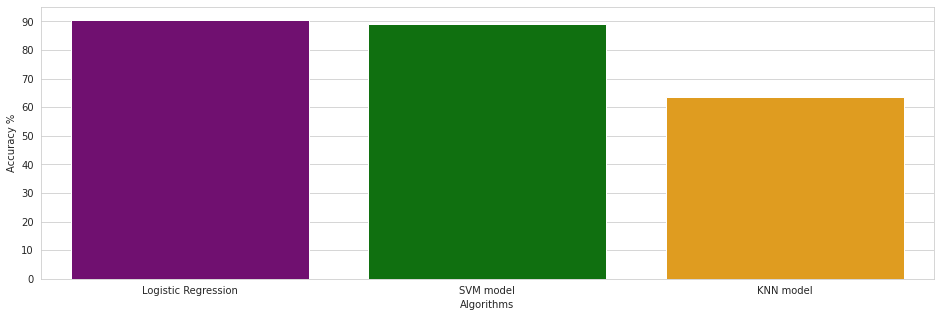

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Confusion Matrix

In [ ]:
# Predicted values

Y_test_prediction_lr = model.predict(X_test)
Y_test_prediction_knn = knn.predict(X_test)
Y_test_prediction_svm = SVMmodel.predict(X_test)

In [ ]:
cm_lr = confusion_matrix(Y_test,Y_test_prediction_lr)
cm_knn = confusion_matrix(Y_test,Y_test_prediction_knn)
cm_svm = confusion_matrix(Y_test,Y_test_prediction_svm)

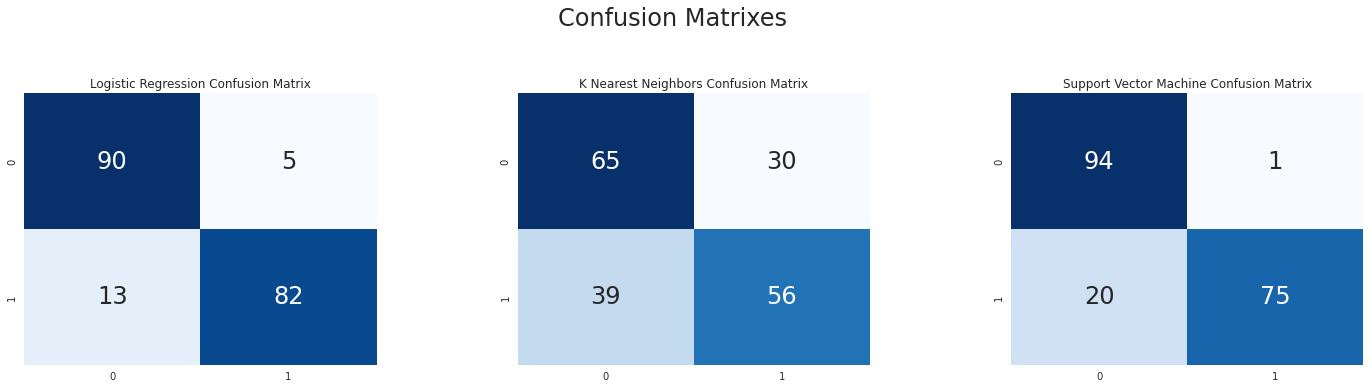

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()